In [1]:
import numpy as np
import pandas as pd
import ruamel.yaml as yaml
from pathlib import Path
import seaborn as sns
from matplotlib import pyplot as plt

## Find results files

In [2]:
seeds = list(range(1, 11))
# results_folder = Path('../results/3S1L')
results_folder = Path('../results/1S3L')

In [3]:
experiment_results = list(sorted(results_folder.glob('user_experience_*/results.yaml')))

In [4]:
def is_valid_seed(results_file):
    try:
        seed = int(results_file.parts[-2].split("_")[-1])
        return seed in seeds
    except ValueError:
        return False
experiment_results = list(filter(is_valid_seed, experiment_results))

## Load results

In [5]:
results = []
for results_file in experiment_results:
    with open(results_file, 'r') as f:
        data = yaml.safe_load(f)
        data['experiment_name'] = results_file.parts[-2][:results_file.parts[-2].rindex('_')]
        data['seed'] = int(results_file.parts[-2].split("_")[-1])
        results.append(data)

In [6]:
results = pd.DataFrame.from_dict(results)
results.insert(0, 'seed', results.pop('seed'))
results.insert(0, 'experiment_name', results.pop('experiment_name'))
results

,experiment_name,seed,delay_avg,delay_max,dispatch_time,dispatch_time_count,dispatch_time_total,jobs_delayed,jobs_delayed_percentage,jobs_late,...,duration_predictor_inference_time_total,duration_predictor_training_time,duration_predictor_training_time_count,duration_predictor_training_time_total,worker_selector_inference_time,worker_selector_inference_time_count,worker_selector_inference_time_total,worker_selector_training_time,worker_selector_training_time_count,worker_selector_training_time_total
0,user_experience_limits,1,12.302401,17774.057,0.000008,562798,4.674301,1418,0.002520,6284,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,user_experience_limits,10,12.302401,17774.057,0.000008,562798,4.587283,1418,0.002520,6284,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,user_experience_limits,2,12.302401,17774.057,0.000008,562798,4.612752,1418,0.002520,6284,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,user_experience_limits,3,12.302401,17774.057,0.000008,562798,4.635352,1418,0.002520,6284,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,user_experience_limits,4,12.302401,17774.057,0.000008,562798,4.593612,1418,0.002520,6284,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,user_experience_zero,5,12.203147,11452.070,0.000008,562798,4.517472,1311,0.002329,6460,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
116,user_experience_zero,6,12.203147,11452.070,0.000008,562798,4.486884,1311,0.002329,6460,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
117,user_experience_zero,7,12.203147,11452.070,0.000008,562798,4.544552,1311,0.002329,6460,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
118,user_experience_zero,8,12.203147,11452.070,0.000008,562798,4.620301,1311,0.002329,6460,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
results['experiment_name'].value_counts()

experiment_name
user_experience_limits               10
user_experience_nn                   10
user_experience_nn_embedding         10
user_experience_oracle               10
user_experience_rl_embedding         10
user_experience_rl_embedding_fast    10
user_experience_rl_nn                10
user_experience_rl_nn_fast           10
user_experience_rl_oracle            10
user_experience_rl_oracle_fast       10
user_experience_stats                10
user_experience_zero                 10
Name: count, dtype: int64

C:\Users\micha\AppData\Local\Temp\ipykernel_21176\457404338.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  p.set_xticklabels([t.get_text()[16:] for t in p.get_xticklabels()], rotation=90)


[Text(0, 0, 'limits'),
 Text(1, 0, 'nn'),
 Text(2, 0, 'nn_embedding'),
 Text(3, 0, 'oracle'),
 Text(4, 0, 'rl_embedding'),
 Text(5, 0, 'rl_embedding_fast'),
 Text(6, 0, 'rl_nn'),
 Text(7, 0, 'rl_nn_fast'),
 Text(8, 0, 'rl_oracle'),
 Text(9, 0, 'rl_oracle_fast'),
 Text(10, 0, 'stats'),
 Text(11, 0, 'zero')]

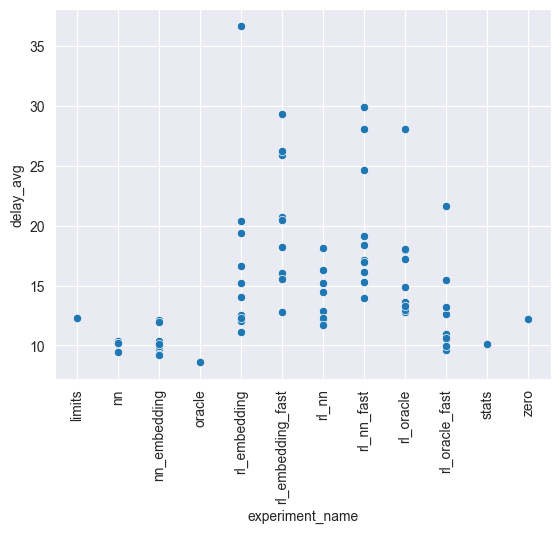

In [8]:
p = sns.scatterplot(data=results, x='experiment_name', y='delay_avg')
p.set_xticklabels([t.get_text()[16:] for t in p.get_xticklabels()], rotation=90)

## Compute aggregate metrics

In [9]:
def rsd(x):
    return np.std(x) / np.mean(x)

results_agg = results.drop(columns=["seed", "simulation_duration"]).groupby('experiment_name').agg(["mean", "std", rsd])
results_agg

delay_avg                      \
                                        mean       std       rsd   
experiment_name                                                    
user_experience_limits             12.302401  0.000000  0.000000   
user_experience_nn                 10.167927  0.248998  0.023232   
user_experience_nn_embedding       10.373380  1.208887  0.110557   
user_experience_oracle              8.605884  0.000000  0.000000   
user_experience_rl_embedding       17.026120  7.574637  0.422053   
user_experience_rl_embedding_fast  20.085720  5.484046  0.259021   
user_experience_rl_nn              13.733460  2.171796  0.150024   
user_experience_rl_nn_fast         19.957831  5.560334  0.264307   
user_experience_rl_oracle          16.175464  4.680980  0.274537   
user_experience_rl_oracle_fast     12.506861  3.666248  0.278096   
user_experience_stats              10.145549  0.000000  0.000000   
user_experience_zero               12.203147  0.000000  0.000000   

                                      delay_max                             \
                                           mean          std           rsd   
experiment_name                                                              
user_experience_limits             17774.057000     0.000000  0.000000e+00   
user_experience_nn                 16378.395000     0.000000  1.110603e-16   
user_experience_nn_embedding       15445.843300  1674.932715  1.028743e-01   
user_experience_oracle             14962.000000     0.000000  0.000000e+00   
user_experience_rl_embedding       31876.986200  6728.252453  2.002379e-01   
user_experience_rl_embedding_fast  23119.433800  3390.280154  1.391168e-01   
user_experience_rl_nn              24988.011801  5702.943733  2.165153e-01   
user_experience_rl_nn_fast         25442.632100  6264.367494  2.335804e-01   
user_experience_rl_oracle          33156.978700  6991.425031  2.000378e-01   
user_experience_rl_oracle_fast     30800.524200  4724.442459  1.455170e-01   
user_experience_stats              17774.057000     0.000000  0.000000e+00   
user_experience_zero               11452.070000     0.000000  1.588350e-16   

                                  dispatch_time                          \
                                           mean       std           rsd   
experiment_name                                                           
user_experience_limits                 0.000008  0.000000  2.117582e-16   
user_experience_nn                     0.002722  0.000031  1.074740e-02   
user_experience_nn_embedding           0.003449  0.000033  9.057059e-03   
user_experience_oracle                 0.000008  0.000000  2.117582e-16   
user_experience_rl_embedding           0.004432  0.000048  1.025169e-02   
user_experience_rl_embedding_fast      0.004301  0.000046  1.021426e-02   
user_experience_rl_nn                  0.003722  0.000041  1.048722e-02   
user_experience_rl_nn_fast             0.003598  0.000049  1.289034e-02   
user_experience_rl_oracle              0.000789  0.000004  4.900932e-03   
user_experience_rl_oracle_fast         0.000772  0.000006  6.803732e-03   
user_experience_stats                  0.000009  0.000000  0.000000e+00   
user_experience_zero                   0.000008  0.000000  2.117582e-16   

                                  dispatch_time_count  ...  \
                                                 mean  ...   
experiment_name                                        ...   
user_experience_limits                       562798.0  ...   
user_experience_nn                           562798.0  ...   
user_experience_nn_embedding                 562798.0  ...   
user_experience_oracle                       562798.0  ...   
user_experience_rl_embedding                 562798.0  ...   
user_experience_rl_embedding_fast            562798.0  ...   
user_experience_rl_nn                        562798.0  ...   
user_experience_rl_nn_fast                   562798.0  ...   
user_experience_rl_oracle          

## Print user experience results for paper

In [16]:
variants = {
    "user_experience_stats": "statistics",
    "user_experience_oracle": "oracle",
    "user_experience_nn": "NN",
    "user_experience_rl_oracle": "RL + oracle",
    "user_experience_rl_nn": "RL + NN",
}

In [17]:
for variant in variants:
    print(f"{variants[variant]:<12}& "
          f"{results_agg.loc[variant, ('jobs_on_time_percentage', 'mean')] * 100:.2f}\\% & "
          f"{results_agg.loc[variant, ('jobs_delayed_percentage', 'mean')] * 100:.2f}\\%  & "
          f"{results_agg.loc[variant, ('jobs_late_percentage', 'mean')] * 100:.2f}\\% & "
          f"{results_agg.loc[variant, ('delay_avg', 'mean')]:.2f} s ({results_agg.loc[variant, ('delay_avg', 'std')]:.2f}) \\\\")

statistics  & 98.75\% & 0.26\%  & 0.99\% & 10.15 s (0.00) \\
oracle      & 98.81\% & 0.26\%  & 0.93\% & 8.61 s (0.00) \\
NN          & 98.68\% & 0.24\%  & 1.07\% & 10.17 s (0.25) \\
RL + oracle & 98.65\% & 0.29\%  & 1.06\% & 16.18 s (4.68) \\
RL + NN     & 98.59\% & 0.25\%  & 1.17\% & 13.73 s (2.17) \\


## Print time results for paper

In [18]:
results.columns

Index(['experiment_name', 'seed', 'delay_avg', 'delay_max', 'dispatch_time',
       'dispatch_time_count', 'dispatch_time_total', 'jobs_delayed',
       'jobs_delayed_percentage', 'jobs_late', 'jobs_late_percentage',
       'jobs_on_time', 'jobs_on_time_percentage', 'jobs_total',
       'simulation_duration', 'simulation_duration_s',
       'duration_predictor_inference_time',
       'duration_predictor_inference_time_count',
       'duration_predictor_inference_time_total',
       'duration_predictor_training_time',
       'duration_predictor_training_time_count',
       'duration_predictor_training_time_total',
       'worker_selector_inference_time',
       'worker_selector_inference_time_count',
       'worker_selector_inference_time_total', 'worker_selector_training_time',
       'worker_selector_training_time_count',
       'worker_selector_training_time_total'],
      dtype='object')

In [19]:
for variant in variants:
    def format_time(time_column, prec=1):
        val = results_agg.loc[variant, (time_column, 'mean')]
        if pd.isna(val):
            return "--"
        return f"{val * 1000:.{prec}f} ms"
    print(f"{variants[variant]:<12}& "
          f"{format_time('dispatch_time', 2)} & "
          f"{format_time('duration_predictor_inference_time')} & "
          f"{format_time('duration_predictor_training_time')} & "
          f"{format_time('worker_selector_inference_time')} & "
          f"{format_time('worker_selector_training_time')} \\\\")

statistics  & 0.01 ms & -- & -- & -- & -- \\
oracle      & 0.01 ms & -- & -- & -- & -- \\
NN          & 2.72 ms & 2.7 ms & 560.3 ms & -- & -- \\
RL + oracle & 0.79 ms & -- & -- & 0.8 ms & 140.3 ms \\
RL + NN     & 3.72 ms & 2.9 ms & 630.9 ms & 0.8 ms & 144.2 ms \\


In [20]:
rsds = results_agg.loc[variants.keys(), [(t, 'rsd') for t in ['dispatch_time', 'duration_predictor_inference_time', 'duration_predictor_training_time', 'worker_selector_inference_time', 'worker_selector_training_time']]]
print(f"Max RSD: {rsds.max(axis=None):.4f}")
rsds

Max RSD: 0.0114


,dispatch_time,duration_predictor_inference_time,duration_predictor_training_time,worker_selector_inference_time,worker_selector_training_time
,rsd,rsd,rsd,rsd,rsd
experiment_name,,,,,
user_experience_stats,0.000000e+00,NaN,NaN,NaN,NaN
user_experience_oracle,2.117582e-16,NaN,NaN,NaN,NaN
user_experience_nn,1.074740e-02,0.010706,0.011171,NaN,NaN
user_experience_rl_oracle,4.900932e-03,NaN,NaN,0.004964,0.008702
user_experience_rl_nn,1.048722e-02,0.011367,0.010771,0.008983,0.006862
